# Project: Investigate a Dataset - [No_Show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description   

> The *no-show appointments* dataset was selected in this project from [Kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments). This dataset collects information from 100k medical appointments in Brazil and trys to compare the characteristics of the no-show patients with those who showed up for their appoints. 

> The dataset included patient ID, appointment ID, patients gender, scheduled date(on what day the patient set up their appointment), appointment date, age, neighbourhood(the location of the hospital), scholarship(whether or not the patient is enrolled in Brasilian welfare program *Bolsa Familia*), hipertension, diabetes, alcoholism, handcap, SMS_received(whether or not the patient received a reminder before appointment), and no-show(it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up). 

### Question(s) for Analysis
>**1**: Do demographic characteristics like gender, age play a role in affecting no-show rate?
>
>**2**: Is sending a reminder before appointments helpful in terms of increasing the possibilities of paients showing up for their appointments?
>
>**3**: Do patients joining the welfare program *Bolsa Familia* tend to show up for their appointment compared to those not in the program?
>
>**4**: Is heath condition(hypertension, diabetes, alcoholism)related to no-show rate?
>
>**5**: Are patients who did not show up scheduled their appointments way before their appointment?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

> Assess and clean the dataset in order to prepare for future analysis.


### Steps been taken
- Assess data information as a whole.
- Check missing value and duplicates.
- rename varibles "Hipertension" to "Hypertension","Handcap" to "Handicap", "no-show" to "NoShow".
- Transform data types.
- Create a column "TimeDiff" indicating the time difference between scheduled appointments and actual appointments. 

### 1. Load the data and look at the data as a whole

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# data information
df.shape

(110527, 14)

In [4]:
# get a general idea of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
# check data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

### Observation:

> 1. The data table contains 110527 rows and 14 columns.
>
>2. The average Age for the patients is 37 years old, with the oldest been 115(probably a typo), and youngest been -1(absolutely a typo!).
>
>3. Gender is string and handicap is int. Since handicap has a maximum of 4 and minimun of 1, it should be categorized like gender. So the two column should be transformed into category type.
>
>4. Data types of ScheduledDay and AppointmentDay should be datetime.
>
>5. The values in column Scholarship, Hypertension, Diabetes, Alcoholism, SMS_received, and NoShow can be categorized as yes or no, therefore, the data types of these columns should be bool.



### 2. Check missing value, duplicates, and strange data.

In [6]:
#check duplications
df.duplicated().sum()

0

In [7]:
#check missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There is no duplicates and no missing values.

In [8]:
# check how many patients and how many appointments we have in the data
[df.PatientId.nunique(),df.AppointmentID.nunique()]

[62299, 110527]

The dataset contains 62299 patients and 110527 appointments, which indicates one patient had muliple appointments.
Since Age contains unusual values, we can further investigate age to get more infomation.

In [9]:
# further investigate age
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

There is one patient aged -1, which is an incorrect input. I decided to change it to age 0. And there are 5 patients aged 115, 4 paitients aged 100, and 2 patients aged 102. It might be true that there are patients in that age range, so I decided to keep them as it is. 

In [10]:
# change age=-1 to age=0
df.Age.replace({-1:0}, inplace=True)

In [11]:
#check if the change is made
df.Age.value_counts()

0      3540
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

Age=-1 is no longer there, Age=0 is 3540 compared to 3539 before change.

### 3. Rename varibles "Hipertension" ,"Handcap", "no-show"  for consistency. 

In [12]:
#rename column names that contain typos and no-show to NoShow for consistency
df.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap','No-show':'NoShow'},inplace=True)

In [13]:
#check if the changes were made
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### 4. Transform data types.

Since values in column of NoShow is not addable, I am going to change "yes" to "1", and "no" to "0". In that case, we can better calculate and analyze the information in this column.

In [14]:
#change the values in "NoShow" column.
df.NoShow.replace({'No':0,'Yes':1},inplace=True)

In [15]:
#check if the values are changed
df.NoShow.value_counts()

0    88208
1    22319
Name: NoShow, dtype: int64

In [16]:
#change the datatype of "NoShow","Scholarship", "Hypertension","diabetes","Alcoholism",and "SMS_received" to boolean
for c in ["NoShow","Scholarship", "Hypertension","Diabetes","Alcoholism","SMS_received"]:
    df[c] = df[c].astype('bool')

In [17]:
#change the datatype of "ScheduledDay","AppointmentDay".
for c in ["ScheduledDay","AppointmentDay"]:
    df[c] = df[c].astype('datetime64')

In [18]:
#change the datatype of "Gender","Neighbourhood","Handicap" to categorical.
for c in ["Gender","Neighbourhood","Handicap"]:
    df[c] = df[c].astype('category')

In [19]:
#confirm the change of data types.
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                  category
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood           category
Scholarship                 bool
Hypertension                bool
Diabetes                    bool
Alcoholism                  bool
Handicap                category
SMS_received                bool
NoShow                      bool
dtype: object

### 5. Create a column "TimeDiff"
I want to see if the days between appointment scheduled and appointment day mattered to no-show rate. So I calculated the diffences between these two days.

In [20]:
#Create the values of time difference.
TimeDiff=df['AppointmentDay']-df['ScheduledDay']
TimeDiff.describe()

count                        110527
mean      9 days 17:08:34.161960425
std      15 days 05:51:27.891504122
min               -7 days +10:10:40
25%        -1 days +15:41:31.500000
50%                 3 days 11:22:18
75%         14 days 07:41:34.500000
max               178 days 13:19:01
dtype: object

In [21]:
# add TimeDiff to the dataset
df['TimeDiff']=TimeDiff

In [22]:
# confirm the column is added
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,TimeDiff
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,False,False,-1 days +05:21:52
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,False,-1 days +07:51:33
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,False,-1 days +07:40:56
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,False,-1 days +06:30:29
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,0,False,False,-1 days +07:52:37


Since we only care about how many days between scheduled appointments and actual appointments, let's drop information after the days.

In [23]:
#fist change the data type from string to timedate difference
df['TimeDiff'] = pd.to_timedelta(TimeDiff,'D')
df.TimeDiff.dtypes

dtype('<m8[ns]')

In [24]:
#Only keep the days in TimeDiff
df['TimeDiff']=round(TimeDiff / np.timedelta64(1,'D')).astype('int')

In [25]:
#confirming the change
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,TimeDiff
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,False,False,-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,False,-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,False,-1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,False,-1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,0,False,False,-1


In [26]:
#see the value counts
df.TimeDiff.value_counts()

 0      28811
-1      12158
 2       5574
 1       5290
 4       4609
        ...  
 121        1
 125        1
 107        1
 100        1
 123        1
Name: TimeDiff, Length: 137, dtype: int64

The value -1 means actual appointments are earlier than scheduled appointments. This probably implies that the patients didn't schedule an appointment at all. We can combine these data with TimeDiff=0, and count these two groups as the same.

In [27]:
# change values in TimeDiff
df.TimeDiff.replace({-1:0},inplace=True)

In [28]:
#checke if the change is made successfully
df.TimeDiff.value_counts()

0      40969
2       5574
1       5290
4       4609
6       4545
       ...  
121        1
125        1
107        1
100        1
123        1
Name: TimeDiff, Length: 136, dtype: int64

Now we can use this column for future exploration.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Do demographic characteristics like gender, age, neibourhood play a role in affecting no-show rate?)
The first step I would like to take is to see the proportion of show-up and no-show appointments.This helps us to understand how the majority of the patients behave. 

In [29]:
#calculate the total count of no-show patients(NoSow=1) and show-up patients(NoShow=0)
df_noshow=df.query('NoShow == True')
df_show=df.query('NoShow == False')

df_noshow.count()['AppointmentID'],df_show.count()['AppointmentID']

(22319, 88208)

In [30]:
#calculate the proportion of no-show patients(NoSow=1) and show-up patients(NoShow=0)
df_noshowprop=df_noshow.count()['AppointmentID']/df.count()['AppointmentID']
df_showprop=df_show.count()['AppointmentID']/df.count()['AppointmentID']
df_noshowprop,df_showprop

(0.20193255946510807, 0.798067440534892)

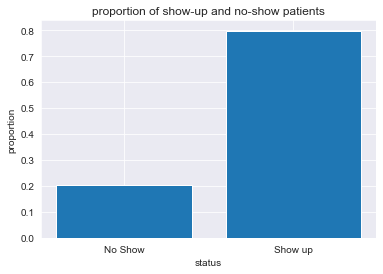

In [31]:
#Visualize the proportion of show-up and no-show patients.
locations=[1,2]
heights=[df_noshowprop,df_showprop]
labels=['No Show','Show up']
plt.bar(locations,heights,tick_label=labels)
plt.title('proportion of show-up and no-show patients')
plt.xlabel('status')
plt.ylabel('proportion');

Then I want to see if demographic characteristics play a role in affecting patients no-show rate

In [32]:
#see age mean group by NoShow
df.groupby('NoShow').Age.mean()

NoShow
False    37.790076
True     34.317667
Name: Age, dtype: float64

Age mean for show-up patients is 37.8 and for no-show patients is 34.3. Overall, older people tend to show up on their sheduled appointments, but the difference is small.

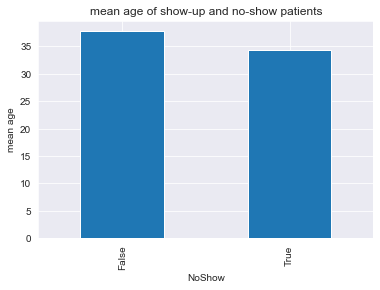

In [33]:
#Visualize the difference using bar chart
labels=['No Show','Show up']
df.groupby('NoShow').Age.mean().plot.bar()
plt.title('mean age of show-up and no-show patients')
plt.ylabel('mean age');

Now let's look at the gender atributes. Are male or female more likely to miss their appointments.

In [34]:
#Calculate the proportion of male and female who did and did not show up on their appointments
totals=df.groupby('Gender').count()['PatientId']
counts=df.groupby(['Gender','NoShow']).count()['PatientId']
proportions=counts/totals
proportions

Gender  NoShow
F       False     0.796854
        True      0.203146
M       False     0.800321
        True      0.199679
Name: PatientId, dtype: float64

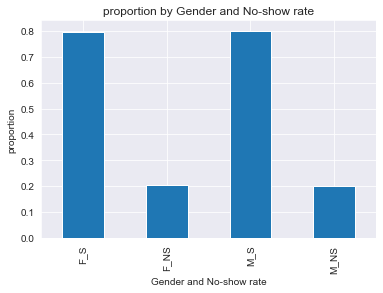

In [35]:
#Visualize the proportions of each gender who did and did not show up on their appointments
proportions.plot(kind='bar',title='proportion by Gender and No-show rate')
plt.xlabel('Gender and No-show rate' )
plt.ylabel('proportion')
plt.xticks([0,1,2,3],['F_S','F_NS','M_S','M_NS']);

From the graph above, we can see the proportion of females who showed up(F_S) is almost the same with the proportion of males who showed up(M_S). As a result, we can conclude that gender does not have any effect on patients no-show rate.

### Research Question 2  (Is sending a reminder before appointments helpful in terms of increasing the possibilities of paients showing up for their appointments?)

In [36]:
#Calculate how many patients who received SMS reminder
totals_SMS=df.groupby('SMS_received').count()['PatientId']
totals_SMS

SMS_received
False    75045
True     35482
Name: PatientId, dtype: int64

So 35482 out of 110527 patients received an SMS reminder.

In [37]:
#Calculate number of show-up and no-show patients for each group.
SMS_counts=df.groupby(['SMS_received','NoShow']).count()['PatientId']
SMS_counts

SMS_received  NoShow
False         False     62510
              True      12535
True          False     25698
              True       9784
Name: PatientId, dtype: int64

Within patients who didn't receive the messages, 62510 showed up, and 12535 did not show up. On the other hand, within patients who received the message,25698 showed up and 9784 did not show up. Since the sample size is very different, it is hard for us to see the trend. So I am going to use portion to analyze.

In [38]:
#Calculate the proportion of show-up and no-show patients for each group.
sms_proportions=counts/totals
sms_proportions

Gender  NoShow
F       False     0.796854
        True      0.203146
M       False     0.800321
        True      0.199679
Name: PatientId, dtype: float64

The data indicates 28% of patients who received SMS did not show up, and 17% of patients who received SMS did not show up. It is not along the lines with our intuition. Let's take a look at the visualization.

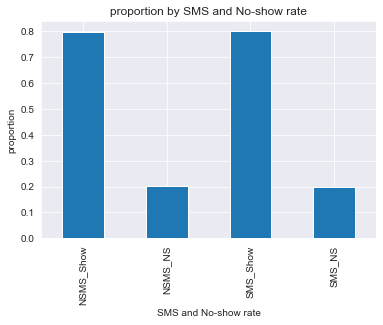

In [39]:
#Visualize the proportion of show-up and no-show patients for each group.
sms_proportions.plot(kind='bar',title='proportion by SMS and No-show rate')
plt.xlabel('SMS and No-show rate' )
plt.ylabel('proportion')
plt.xticks([0,1,2,3],['NSMS_Show','NSMS_NS','SMS_Show','SMS_NS']);

The data showed patients who did not receive SMS reminder surprisingly had a lower no-show rate. I further look at the data and find out there are a lot of patients who had appointments the same day with their scheduled day. So I decided to check whether these patients received an SMS reminder.

In [40]:
#Calculate how many patients scheduled an immediate appointment
df_a=df.query('TimeDiff==0')
totals=df_a.groupby('SMS_received').count()['PatientId']
totals

SMS_received
False    40969
Name: PatientId, dtype: int64

The result indicates that 40969 patients who scheduled an immediate appointment did not received SMS reminder. But those patients have a very strong possibility to go to their appointments. This will leads to high show-up rate in patients without SMS reminder. Therefore, I am going to remove these patients from my analysis. 

In [41]:
#Calculate how many patients scheduled an appointment for later
df_b=df.query('TimeDiff>0')
totals=df_b.groupby('SMS_received').count()['PatientId']
totals

SMS_received
False    34073
True     35482
Name: PatientId, dtype: int64

In [42]:
#Calculate number of show-up and no-show patients for each group.
counts=df_b.groupby(['SMS_received','NoShow']).count()['PatientId']
counts

SMS_received  NoShow
False         False     23834
              True      10239
True          False     25698
              True       9784
Name: PatientId, dtype: int64

In [43]:
#Calculate proportion of show-up and no-show patients for each group.
sms_proportions=counts/totals
sms_proportions

SMS_received  NoShow
False         False     0.699498
              True      0.300502
True          False     0.724255
              True      0.275745
Name: PatientId, dtype: float64

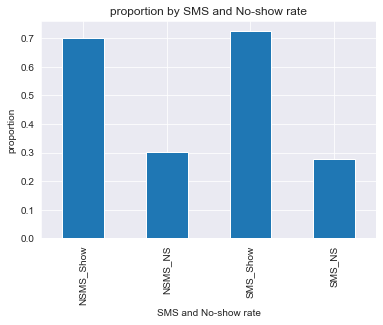

In [44]:
#Visualize proportion of show-up and no-show patients for each group.
sms_proportions.plot(kind='bar',title='proportion by SMS and No-show rate')
plt.xlabel('SMS and No-show rate' )
plt.ylabel('proportion')
plt.xticks([0,1,2,3],['NSMS_Show','NSMS_NS','SMS_Show','SMS_NS']);

From the graph above, we can see no-show rate for patients who did not received a reminder (NSMS_NS) is slightly higher then no-show rate for patients who did received a reminder (SMS_NS).It demonstrated SMS reminder helped patients to show up on their appointments

### Research Question 3  (Do patients joining the welfare program *Bolsa Familia* tend to show up for their appointment compared to those not in the program?)

In [45]:
#Calculate how many patients are in the program and how many are not.
totals_welfare=df.groupby('Scholarship').count()['PatientId']
totals_welfare

Scholarship
False    99666
True     10861
Name: PatientId, dtype: int64

In [46]:
#Calculate the show-up numbers and no-show numbers for each group.
counts_welfare=df.groupby(['Scholarship','NoShow']).count()['PatientId']
counts_welfare

Scholarship  NoShow
False        False     79925
             True      19741
True         False      8283
             True       2578
Name: PatientId, dtype: int64

In [47]:
#Calculate the show-up proportion and no-show proportion for each group.
welfare_proportions=counts_welfare/totals_welfare
welfare_proportions

Scholarship  NoShow
False        False     0.801928
             True      0.198072
True         False     0.762637
             True      0.237363
Name: PatientId, dtype: float64

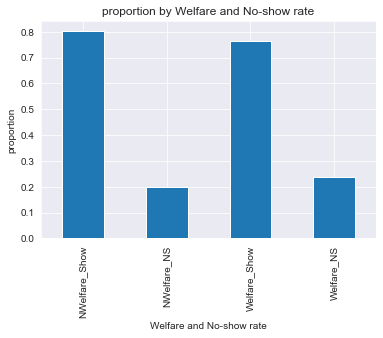

In [48]:
#Visualize the data 
welfare_proportions.plot(kind='bar',title='proportion by Welfare and No-show rate')
plt.xlabel('Welfare and No-show rate' )
plt.ylabel('proportion')
plt.xticks([0,1,2,3],['NWelfare_Show','NWelfare_NS','Welfare_Show','Welfare_NS']);

Patients who are not in the Bolsa Familia have a lower no-show rate, meaning they are more likely to show up on their appointments. But the difference is very small. 

### Research Question 4 (Is heath condition like hypertension, diabetes, alcoholism related to no-show rate?)

,Hypertension,NoShow,percentage
0,False,False,79.096319
1,False,True,20.903681
2,True,False,82.698041
3,True,True,17.301959


,Diabetes,NoShow,percentage
0,False,False,79.637175
1,False,True,20.362825
2,True,False,81.996727
3,True,True,18.003273


,Alcoholism,NoShow,percentage
0,False,False,79.805351
1,False,True,20.194649
2,True,False,79.851190
3,True,True,20.148810


,Handicap,NoShow,percentage
0,0,False,79.764697
1,0,True,20.235303
2,1,False,82.076396
3,1,True,17.923604
4,2,False,79.781421
5,2,True,20.218579
6,3,False,76.923077
7,3,True,23.076923
8,4,False,66.666667
9,4,True,33.333333


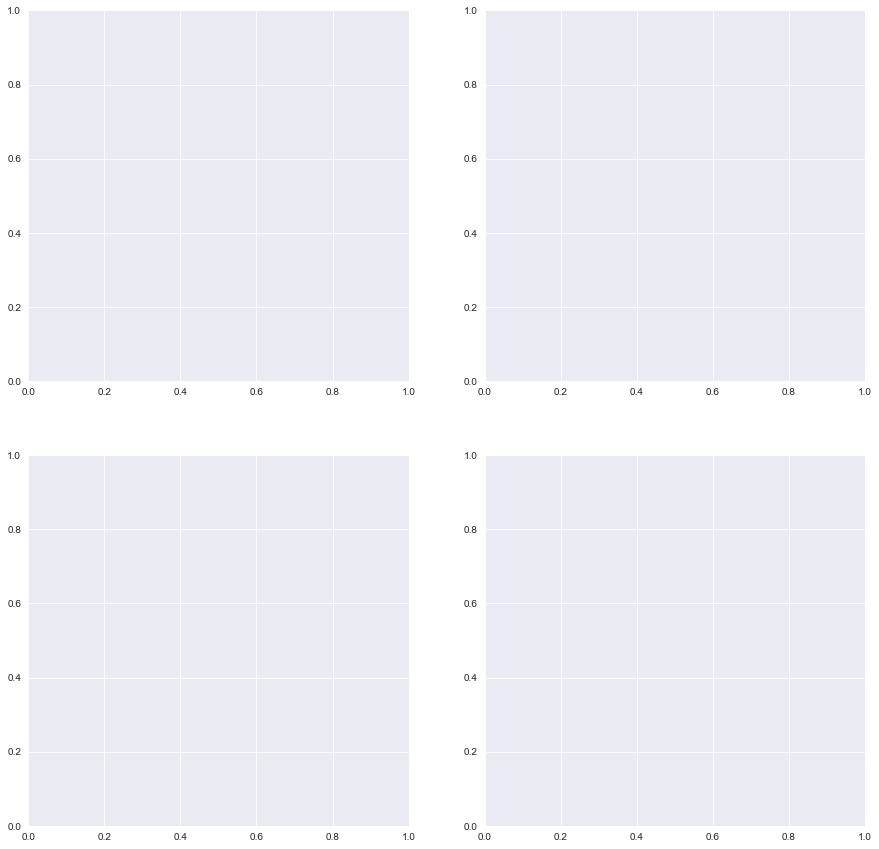

In [53]:
fig,axes = plt.subplots(2,2,figsize=(15,15))

for col,ax in zip(['Hypertension','Diabetes','Alcoholism','Handicap'],axes.flatten()):
    ratio = df.groupby(col)['NoShow'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
    display(ratio)

AttributeError: 'function' object has no attribute 'get'

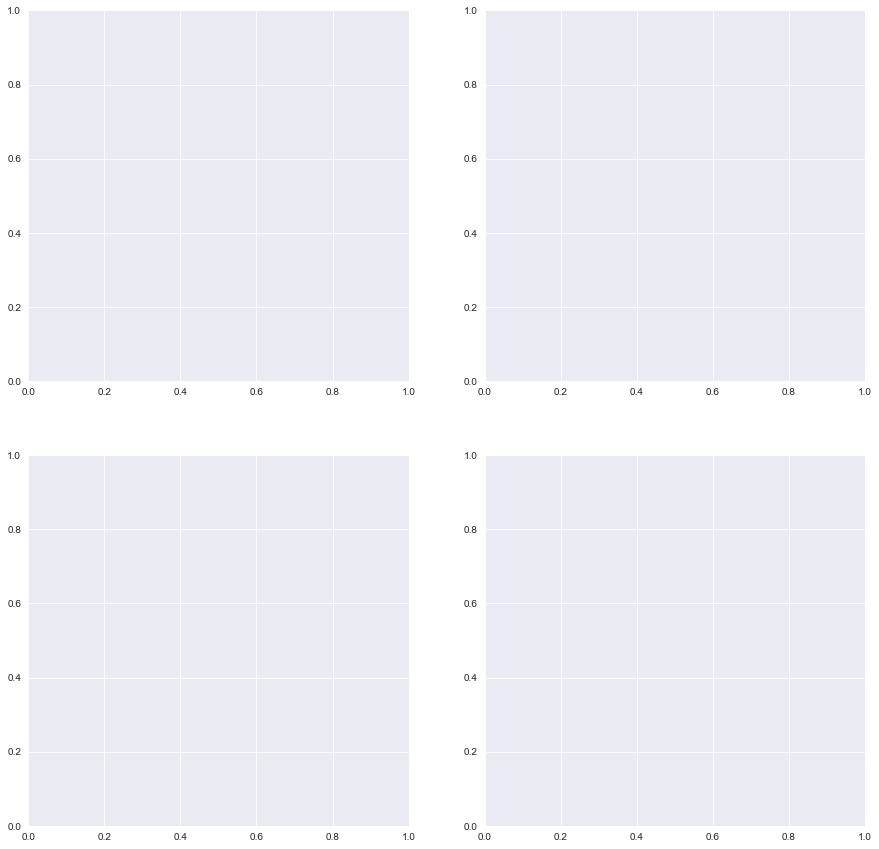

In [49]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

for col, ax in zip(['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap'], axes.flatten()):
    ratio = df.groupby(col)['NoShow'].value_counts(normalize=True).mul(100).rename('percentage').reset_index
    sns.barplot(x=col, y='percentage', hue='NoShow', data=ratio, ax=ax)

From the above two graphs, we can see patients who have health conditions like hypertension or diabetes have a lower no-show rate. They are more likely to show up on their appointments. But patients who admit they are alcoholism showed no difference with those who are not alcoholism.

For those handicapped patients, the higher their handicap levels are, the higher their no-show rate, meaning they are more likely they are going to miss their appointments.

### Research Question 5 (Are patients who did not show up scheduled their appointments way before their appointment?)

Before I do any analysis, there are some negative values in TimeDiff column should be taken care of. Since TimeDiff is calculated by appointment day minus scheduled day, so it does not make sense it is negative. Therefore, I replaced the negative values with 0.

In [ ]:
df.TimeDiff.replace({-7:0},inplace=True)

In [ ]:
df.TimeDiff.replace({-2:0},inplace=True)

In [ ]:
#Check if there is any negative values in the dataset.
df['TimeDiff'].describe()

Now, the minmun of TimeDiff is 0, which means we don't have any negative values.

In [ ]:
#Calculate average TimeDiff for people who did not show up on their appointments
no_show=df.query('NoShow==True')
mean_no_show=no_show.TimeDiff.mean()
mean_no_show

In [ ]:
#Calculate average TimeDiff for people who showed up on their appointments
show=df.query('NoShow==False')
mean_show=show.TimeDiff.mean()
mean_show

In [ ]:
locations=[1,2]
heights=[mean_no_show,mean_show]
labels=['No Show','Show']
plt.bar(locations,heights,tick_label=labels)
plt.title('Average days between appointment day and scheduled day')
plt.xlabel('Show up status');

This graph clearly suggested that patients who did not show up had a longer waiting period. 

<a id='conclusions'></a>
## Conclusions

>1: The first research question we asked is that if demographic features play a role in affecting no-show rate. Based on our observation, male and female did not appear any difference in showing up for their appointments. Therefore, gender does not influence no-show rate. On the other hand, the average age of patients who showed up on their appointments is higher then who did not show up, which can lead to conclusion that younger patients are more likely to miss their scheduled appointments. 
>
>2: Secondly, the effect of sending a reminder before appointments was investigated. The immediate appointments meaning actual appointments and scheduled appointments on the same day were removed to reduce bias. Our data indicates that people who received an SMS reminder have a lower rate of not showing up. The result suggested sending a text message reminder is a good way to encourage patients to show up on their appointments.
>
>3: Further more, how the welfare program *Bolsa Familia* affects no-show rate was explored. Our results implies that patients who are not in the *Bolsa Familia* program have a lower no-show rate, meaning they are more likely to show up on their appointments. But the difference is very small. We may ignore the effect of the welfare program *Bolsa Familia*
>
>4: Additionally, we asked if heath condition(hypertension, diabetes, alcoholism)related to no-show rate? Patients who have health conditions like hypertension or diabetes demonstrated a higher show-up possibility, meaning they are less likely to miss their appointments. But the situation for alcoholism is not the case, they showed no difference no mater if they are alcoholism or not. 
>
>For those handicapped patients, as their handicap level goes up, they are less likely to show up on their appointments. This may be due to inconvenience. If hospitals want to increace the show-up rate, it may be beneficial to make the facilities more handicap accessible.
>
>5: The last research question explored whether patients who failed to show up reserved their spots too early. The result indicates that average days between appointment day and scheduled day for show-up patients is significantly shorter than those who miss their appointments. This may suggest the hospital can have a narrower open appointment window for patients to avoid high no-show rate. 



# References:


[https://www.kaggle.com/joniarroba/noshowappointments](https://www.kaggle.com/joniarroba/noshowappointments)


[https://www.kaggle.com/joniarroba/noshowappointments/discussion/41457](https://www.kaggle.com/joniarroba/noshowappointments/discussion/41457)